# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

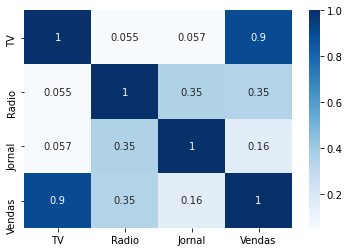

<function matplotlib.pyplot.show(close=None, block=None)>

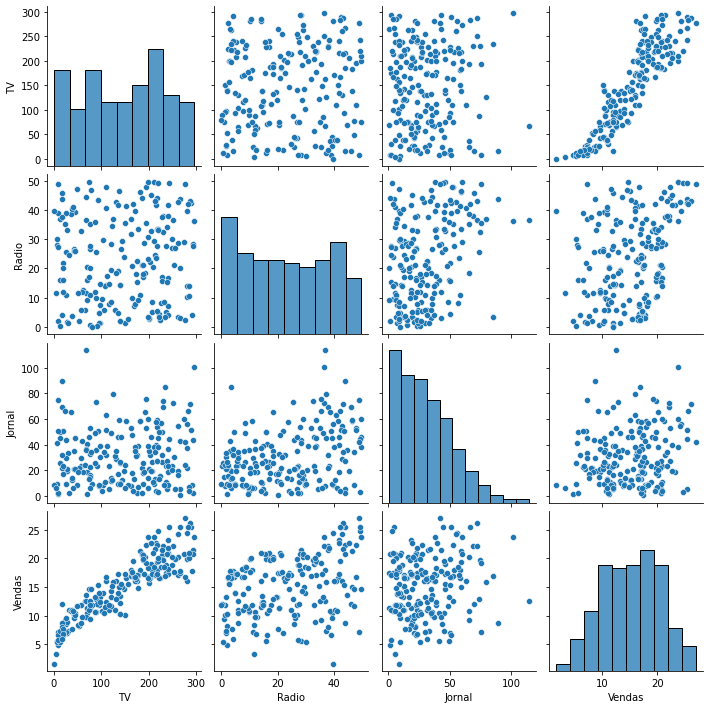

In [2]:
# Avaliar correlação entre colunas
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Blues") # annot dá valor as correlações, cmap muda a cor
plt.show()
# Próximo de 1 tem maior impacto positivo nas vendas (TV tem mais impacto, seguido de radio e jornal)
# A correlação entre as mídias é muito próximas de zero, pq na verdade não se afetam

sns.pairplot(tabela)
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [3]:
from sklearn.model_selection import train_test_split as tts

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = tts(x, y, test_size=0.3, random_state=1) # pode escolher o tamanho do teste, random é para não mudar a forma do teste



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [4]:
# Métodos de inteligência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando inteligências
modelo_Regre = LinearRegression()
modelo_RanFr = RandomForestRegressor()

# Treinando modelos
modelo_Regre.fit(x_treino, y_treino)
modelo_RanFr.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [5]:
from sklearn import metrics

# Fazer as previsoes 
previsao_Regre = modelo_Regre.predict(x_teste)
previsao_RanFr = modelo_RanFr.predict(x_teste)

# Comparar modelos
print(metrics.r2_score(y_teste, previsao_Regre)) # compara(gabarito, previsao)
print(metrics.r2_score(y_teste, previsao_RanFr)) 

0.9071151423684273
0.9643629644092743


#### Visualização Gráfica das Previsões

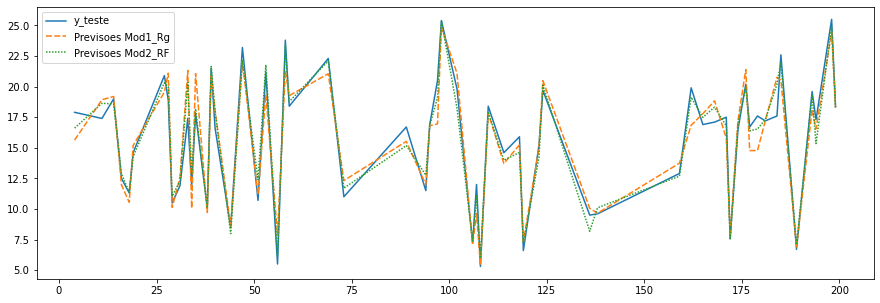

In [9]:
tabela_aux = pd.DataFrame() # tabela vazia
tabela_aux["y_teste"] = y_teste
tabela_aux["Previsoes Mod1_Rg"] = previsao_Regre
tabela_aux["Previsoes Mod2_RF"] = previsao_RanFr

plt.figure(figsize=(15,5)) # Para alterar tamanho do gráfico
sns.lineplot(data=tabela_aux)
plt.show()
# Árvore de Deciões acerta muito mais

#### Qual a importância de cada variável para as vendas?

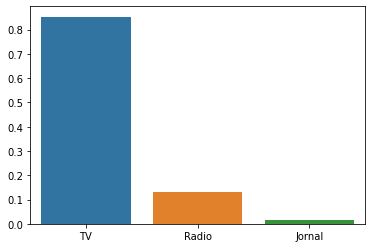

In [10]:
# Porcentagem de impacto das mídias 
sns.barplot(x=x_treino.columns, y=modelo_RanFr.feature_importances_)
plt.show()

#### Conclusão

Melhor investir muito mais em TV, bem menos em Rádio e menos ainda em Jornal.